### Generating Sentinel-2 Data

To produce images of the following locations:
- Swinburne Uni
- Melbourne CBD
- Phillip Island
---

#### Steps to produce images
1. Determine coordinates or multipolygon of above locations
2. Determine RGB bands for visualising a clear image 
3. Query image
---

#### Step 1 - Determine coordinates or multipolygon of above locations
---

In [ ]:
# connect to the API
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date

"""
username: "zach789"
pwd: "cKw!v9wKijgw57Q"
api_url = "https://apihub.copernicus.eu/apihub"

show_progressbars & timeout is optional
"""
api = SentinelAPI("zach789", "cKw!v9wKijgw57Q", "https://apihub.copernicus.eu/apihub", show_progressbars=True, timeout=60)

# Search product ID using OpenSearch
data_date = date=(date(2020, 5, 7), date(2023, 5, 20))
product_type = "L2__CH4___"
kw = {
    "platformname": "Sentinel-2"
}

# Query data
result = api.query(date=data_date, producttype=product_type, **kw) # important: producttype='L2__CH4___'


# Testing with result's structure
# print(result) # (product ID, product attribute) ordered dictionary value



---
### Retrieving data
The cell below is to explore how to search and download a particular product. The [product](https://s5phub.copernicus.eu/dhus/odata/v1/Products('93ea5d16-84dc-4d42-bd77-9fa7120376e4')/$value) is one of many S5P datasets in the [S5P Pre-Ops Data Hub](https://s5phub.copernicus.eu/dhus/#/home).

The attributes of the product are picked to test out the funcitonality of the sentinelsat library and OpenSearch API

***Result:*** 
The [product](https://s5phub.copernicus.eu/dhus/odata/v1/Products('93ea5d16-84dc-4d42-bd77-9fa7120376e4')/$value) was narrowed down and found with search query 

***TODO:*** 
Determine the appropriate keyword arguments necessary for querying based on user input

In [24]:
# connect to the API
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date

"""
username & pwd: "s5pguest"
api_url = "https://s5phub.copernicus.eu/dhus"

show_progressbars & timeout is optional
"""
api = SentinelAPI("s5pguest", "s5pguest", "https://s5phub.copernicus.eu/dhus", show_progressbars=True,timeout=60)

# Search product ID using OpenSearch
data_date = date=(date(2020, 5, 7), date(2023, 5, 20))
product_type = "L2__CH4___"
kw = {
    "orbitnumber": 28925
}

# Query data
result = api.query(date=data_date, producttype=product_type, **kw) # important: producttype='L2__CH4___'


# Testing with result's structure
# print(result) # (product ID, product attribute) ordered dictionary value



OrderedDict([('f6b254d3-eeed-4051-9ad5-1752dfd60b23', {'title': 'S5P_OFFL_L2__CH4____20230514T034638_20230514T052808_28925_03_020500_20230515T195331', 'link': "https://s5phub.copernicus.eu/dhus/odata/v1/Products('f6b254d3-eeed-4051-9ad5-1752dfd60b23')/$value", 'link_alternative': "https://s5phub.copernicus.eu/dhus/odata/v1/Products('f6b254d3-eeed-4051-9ad5-1752dfd60b23')/", 'link_icon': "https://s5phub.copernicus.eu/dhus/odata/v1/Products('f6b254d3-eeed-4051-9ad5-1752dfd60b23')/Products('Quicklook')/$value", 'summary': 'Date: 2023-05-14T04:08:12Z, Instrument: TROPOMI, Satellite: Sentinel-5 Precursor, Size: 66.56 MB', 'ondemand': 'false', 'ingestiondate': datetime.datetime(2023, 5, 16, 5, 35, 10, 257000), 'beginposition': datetime.datetime(2023, 5, 14, 4, 8, 12), 'endposition': datetime.datetime(2023, 5, 14, 5, 6, 36), 'generationdate': datetime.datetime(2023, 5, 15, 19, 53, 31), 'orbitnumber': 28925, 'filename': 'S5P_OFFL_L2__CH4____20230514T034638_20230514T052808_28925_03_020500_20230

In [25]:
# Get product id
# For easy access to the ordered dictionary value, use next(iter(result)) where 
# iter is an iterator and next returns the next value in the iterator
result_iter = next(iter(result))
product_id = result_iter

# for attribute in result[product_id]:
#     print(attribute)

# download data
# download_dir = 'C:\Users\Joshua\OneDrive - Swinburne University\Swinburne\SWE40001\Software-Engineering-Project-A\Download Results'
# api.download(product_id, download_dir)

### Test conversion to dataframe, geodataframe and geojson as well as plot

Axes(0.125,0.255667;0.775x0.478666)


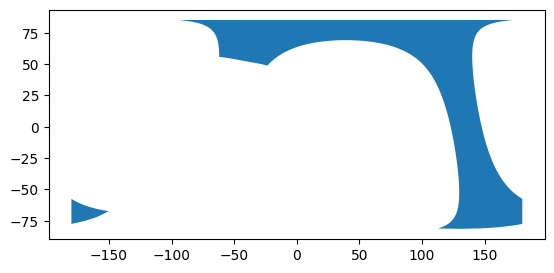

In [49]:
# Not used atm
import geopandas as gpd
import numpy as np

result_df = api.to_dataframe(result)
result_geojson = api.to_geojson(result)
result_gdf = api.to_geodataframe(result)

# Establish legend keywords for legend details
legend_keyw = {"label": "Methane concentration data for orbit 28925", "orientation": "vertical"}

# Checking the types of metadata stored in the result
# print(result_gdf.head())

# Plot the data
print(result_gdf.plot(legend=True, legend_kwds=legend_keyw))

